In [20]:
import functools
import glob
import pandas as pd
import numpy as np

# CCSE

In [36]:
df = pd.concat(map(functools.partial(pd.read_csv), glob.glob("data/csse_covid19_daily_reports/*.csv")), sort=True)

In [45]:
df = df.set_index(pd.DatetimeIndex(df['Last Update']))

In [46]:
#df['Country/Region'].unique()

# Mexico Daily Cases

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
plt.rcParams['figure.figsize'] = [20,8]

In [49]:
mex = df[df['Country/Region'] == 'Mexico'].copy()

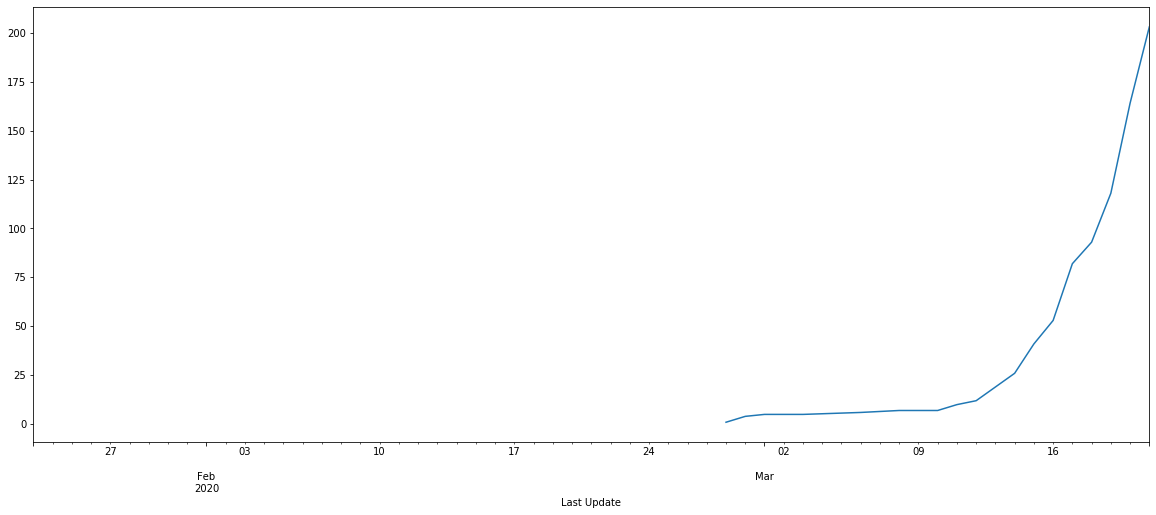

In [41]:
daily_report = mex.index.to_period('D')
mex.groupby(daily_report)['Confirmed'].apply(lambda x: np.mean(x)).plot()